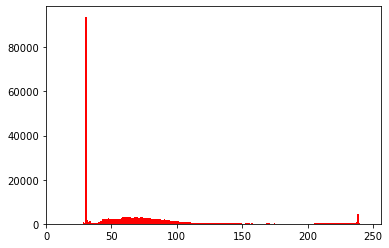

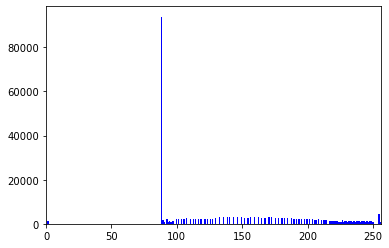

NameError: name 'widgets' is not defined

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('3. Negative test.tif', cv2.IMREAD_GRAYSCALE)
height, width = src.shape[0], src.shape[1]

plt.hist(src.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

histogram = np.zeros(256)
lookUpTable = np.zeros(256)
    
for i in range(height):
    for j in range(width):
        histogram[src[i][j]] += 1

sum = 0.0
scale_factor = 255.0/(height * width)

for i in range(256):
    sum += histogram[i]
    lookUpTable[i] = round( sum * scale_factor )

for i in range(height):
    for j in range(width):
        src[i][j] = lookUpTable[src[i][j]]

plt.hist(src.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.show()


    
show_img = widgets.Image(
    value = cv2.imencode(".jpeg", src)[1].tobytes(),
    format = 'jpeg'
)
display(show_img)
time.sleep(2)
show_img.close()

In [ ]:
def gaussianFiltering_gray(name):
    try:
        img = Image.open("./example/hw2/%s" %name)
    except IOError:
        img = Image.open("./example/hw2/Fig0504(i)(salt-pepper-noise).jpg")

    img_arr = np.asarray(img)
    img_arr = img_arr.astype('float32')

    img_result = convolution(img_arr, gaussian2D(3))
    img_result = img_result.astype('uint8')
    img_result = Image.fromarray(img_result)
    
    save_img = np.array(img_result)
    cv2.imwrite("./result/gaussianFilterGray.png", save_img) 
   
    img_byte_arr = io.BytesIO()
    img_result.save(img_byte_arr, format='PNG')
    img_byte_arr = img_byte_arr.getvalue()

    show_img = widgets.Image(
        value=img_byte_arr,
        format='png',
        width=300,
        height=400,
    )
    display(show_img)
    time.sleep(2)
    show_img.close()